In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import ttest

In [2]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/out/pmid_data.csv')

# Data Visualization

In [4]:
relevance_data = data[data['search_type'] == 'relevance']
pubdate_desc_data = data[data['search_type'] == 'pubdate_desc']

In [5]:
citations_relevance = relevance_data[['query', 'search_type', 'page', 'citation_count']]

In [6]:
#Scatter plot of x vs. y in number of citations with Page 1 on one axis and Page 2 on y axis

citations_page1 = citations_relevance[citations_relevance['page'] == 1]['citation_count'].tolist()
citations_page2 = citations_relevance[citations_relevance['page'] == 2]['citation_count'].tolist()


Because RCR works only for papers published earlier than 2021, it will not be possible to compare RCR between relevance and publication date. Will see if average RCR is different between first and second page

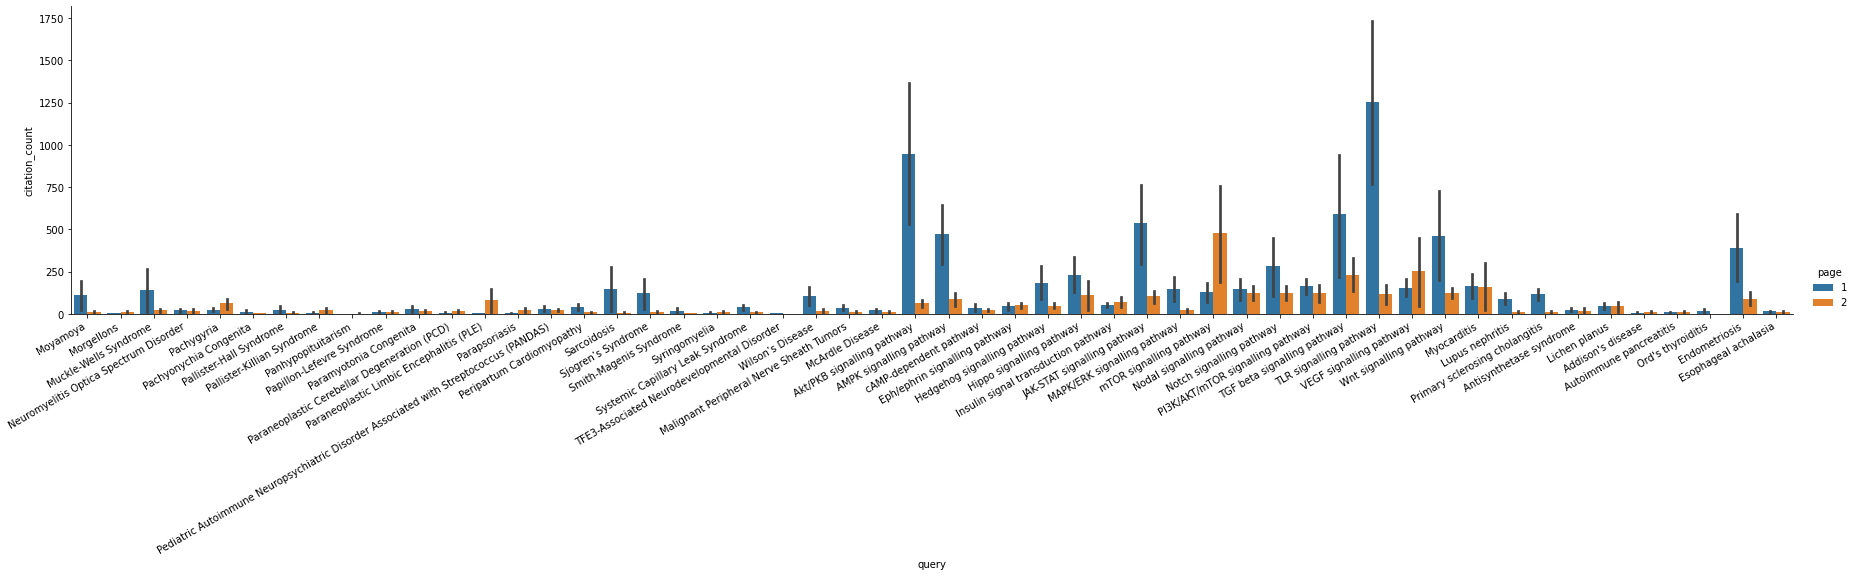

In [7]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[:1000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

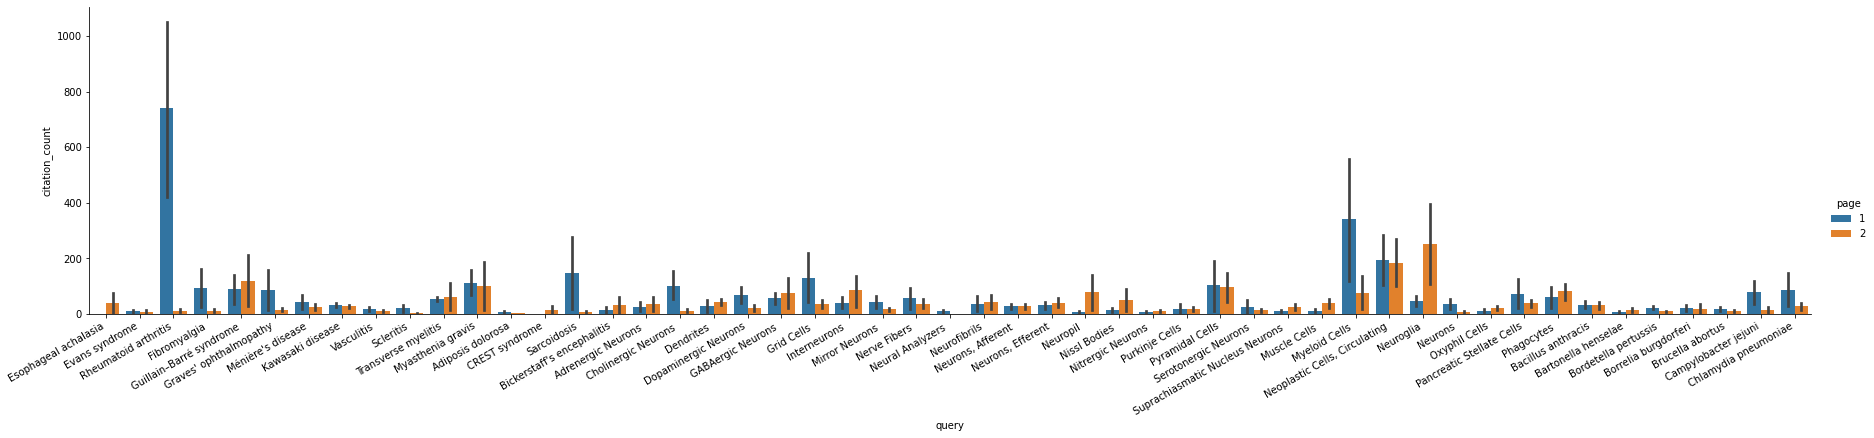

In [8]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[1000:2000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

# APT Score

In [9]:
biomedical_triangle = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/apt.csv')

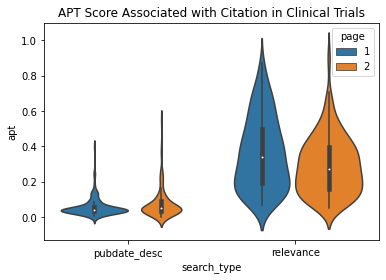

In [10]:
sns.violinplot(data=biomedical_triangle, x='search_type', y='apt', hue='page').set_title('APT Score Associated with Citation in Clinical Trials')

plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/apt_score.png', dpi=300, bbox_inches='tight')


In [11]:
x = biomedical_triangle[biomedical_triangle['search_type'] == 'pubdate_desc']
y = biomedical_triangle[biomedical_triangle['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['apt'].tolist()
b = y[y['page'] == 1]['apt'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-19.538473,360,two-sided,1.796754e-58,"[-0.33, -0.27]",2.053839,5.914e+54,1.0


In [12]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['apt'].tolist()
b = y[y['page'] == 2]['apt'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.452155,343.620726,two-sided,0.000626,"[0.03, 0.11]",0.363458,33.455,0.930401


# Journal Country of Origin

In [13]:
country_of_origin_journal = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/country_journal.csv')

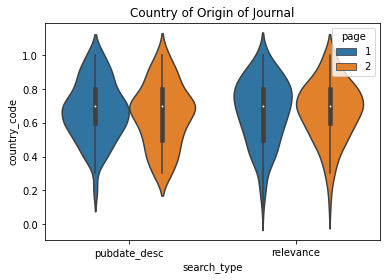

In [14]:
sns.violinplot(data=country_of_origin_journal, x='search_type', y='country_code', hue='page').set_title('Country of Origin of Journal')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/journal_country_of_origin.png', dpi=300, bbox_inches='tight')


In [15]:
country_of_origin_journal

,query,search_type,page,country_code
0,AMPK signalling pathway,pubdate_desc,1,0.7
1,AMPK signalling pathway,pubdate_desc,2,0.9
2,AMPK signalling pathway,relevance,1,1.0
...,...,...,...,...
717,structural racism,pubdate_desc,2,0.7
718,structural racism,relevance,1,0.9
719,structural racism,relevance,2,0.9


In [16]:
x = country_of_origin_journal[country_of_origin_journal['search_type'] == 'pubdate_desc']
y = country_of_origin_journal[country_of_origin_journal['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['country_code'].tolist()
b = y[y['page'] == 1]['country_code'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.114235,360,two-sided,0.909115,"[-0.04, 0.04]",0.012008,0.117,0.051488


In [17]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['country_code'].tolist()
b = y[y['page'] == 2]['country_code'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.039039,356.20408,two-sided,0.968881,"[-0.04, 0.04]",0.004113,0.117,0.050174


# Is English Only

In [18]:
is_english_only = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/is_english_only.csv')
is_english_only

,query,search_type,page,is_english_only
0,AMPK signalling pathway,pubdate_desc,1,1.0
1,AMPK signalling pathway,pubdate_desc,2,1.0
2,AMPK signalling pathway,relevance,1,1.0
...,...,...,...,...
717,structural racism,pubdate_desc,2,1.0
718,structural racism,relevance,1,1.0
719,structural racism,relevance,2,1.0


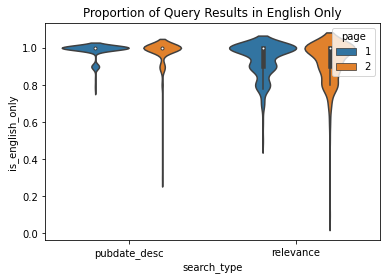

In [19]:
sns.violinplot(data=is_english_only, x='search_type', y='is_english_only', hue='page').set_title('Proportion of Query Results in English Only')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/is_english_only.png', dpi=300, bbox_inches='tight')


In [20]:
x = is_english_only[is_english_only['search_type'] == 'pubdate_desc']
y = is_english_only[is_english_only['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['is_english_only'].tolist()
b = y[y['page'] == 1]['is_english_only'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.703265,360,two-sided,7.890295e-11,"[0.04, 0.06]",0.704632,9.986e+07,1.0


In [21]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['is_english_only'].tolist()
b = y[y['page'] == 2]['is_english_only'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.332212,338.819424,two-sided,0.183686,"[-0.01, 0.04]",0.140607,0.273,0.264965


# Human, Animal, and Molecular/Cellular

In [22]:
human_mol_cell = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/human_animal_molcellular.csv')
human_mol_cell

,query,search_type,page,human,animal,molecular_cellular
0,AMPK signalling pathway,pubdate_desc,1,0.117,0.215,0.668
1,AMPK signalling pathway,pubdate_desc,2,0.211,0.067,0.522
2,AMPK signalling pathway,relevance,1,0.196,0.241,0.564
...,...,...,...,...,...,...
717,structural racism,pubdate_desc,2,1.000,0.000,0.000
718,structural racism,relevance,1,0.875,0.025,0.100
719,structural racism,relevance,2,0.925,0.000,0.075


In [23]:
human_mol_cell_melt = human_mol_cell.melt(id_vars=['query', 'search_type', 'page'])

In [24]:
human_mol_cell_melt

,query,search_type,page,variable,value
0,AMPK signalling pathway,pubdate_desc,1,human,0.117
1,AMPK signalling pathway,pubdate_desc,2,human,0.211
2,AMPK signalling pathway,relevance,1,human,0.196
...,...,...,...,...,...
2157,structural racism,pubdate_desc,2,molecular_cellular,0.000
2158,structural racism,relevance,1,molecular_cellular,0.100
2159,structural racism,relevance,2,molecular_cellular,0.075


In [25]:
readability_abstract = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/readability_fk_score_abstract.csv')
readability_abstract


,query,search_type,page,fkscore_abstract
0,AMPK signalling pathway,pubdate_desc,1,18.218900
1,AMPK signalling pathway,pubdate_desc,2,25.255778
2,AMPK signalling pathway,relevance,1,16.137900
...,...,...,...,...
717,structural racism,pubdate_desc,2,20.426333
718,structural racism,relevance,1,13.019111
719,structural racism,relevance,2,22.852750


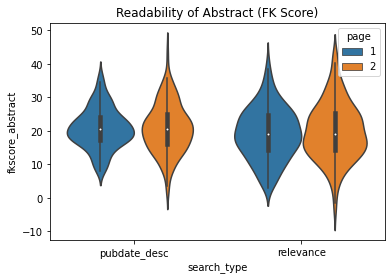

In [26]:
sns.violinplot(data=readability_abstract, x='search_type', y='fkscore_abstract', hue='page').set_title('Readability of Abstract (FK Score)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/readability_abstract.png', dpi=300, bbox_inches='tight')


In [29]:
readability_abstract

,query,search_type,page,fkscore_abstract
0,AMPK signalling pathway,pubdate_desc,1,18.218900
1,AMPK signalling pathway,pubdate_desc,2,25.255778
2,AMPK signalling pathway,relevance,1,16.137900
...,...,...,...,...
717,structural racism,pubdate_desc,2,20.426333
718,structural racism,relevance,1,13.019111
719,structural racism,relevance,2,22.852750


In [30]:
x = readability_abstract[readability_abstract['search_type'] == 'pubdate_desc']
y = readability_abstract[readability_abstract['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['fkscore_abstract'].tolist()
b = y[y['page'] == 1]['fkscore_abstract'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.121542,360,two-sided,0.034559,"[0.11, 2.96]",0.223012,1.003,0.561973


In [31]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['fkscore_abstract'].tolist()
b = y[y['page'] == 2]['fkscore_abstract'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.764543,353.812351,two-sided,0.445053,"[-2.33, 1.03]",0.080635,0.154,0.118878


In [27]:
readability_title = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/readability_fk_score_title.csv')
readability_title


,query,search_type,page,fkscore_title
0,AMPK signalling pathway,pubdate_desc,1,-15.6237
1,AMPK signalling pathway,pubdate_desc,2,-22.7690
2,AMPK signalling pathway,relevance,1,23.3960
...,...,...,...,...
717,structural racism,pubdate_desc,2,6.7678
718,structural racism,relevance,1,19.2629
719,structural racism,relevance,2,-0.6658


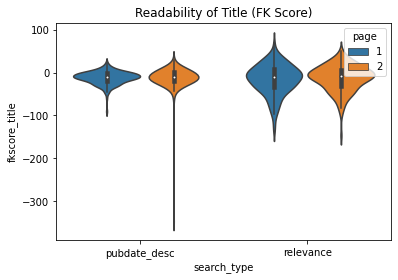

In [28]:
sns.violinplot(data=readability_title, x='search_type', y='fkscore_title', hue='page').set_title('Readability of Title (FK Score)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/readability_title.png', dpi=300, bbox_inches='tight')


In [32]:
readability_title

,query,search_type,page,fkscore_title
0,AMPK signalling pathway,pubdate_desc,1,-15.6237
1,AMPK signalling pathway,pubdate_desc,2,-22.7690
2,AMPK signalling pathway,relevance,1,23.3960
...,...,...,...,...
717,structural racism,pubdate_desc,2,6.7678
718,structural racism,relevance,1,19.2629
719,structural racism,relevance,2,-0.6658


In [33]:
x = readability_title[readability_title['search_type'] == 'pubdate_desc']
y = readability_title[readability_title['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['fkscore_title'].tolist()
b = y[y['page'] == 1]['fkscore_title'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.383116,360,two-sided,0.167487,"[-1.65, 9.48]",0.14539,0.291,0.281196


In [34]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['fkscore_title'].tolist()
b = y[y['page'] == 2]['fkscore_title'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.87966,351.849225,two-sided,0.379644,"[-9.83, 3.75]",0.092652,0.169,0.141604
